In [1]:
import numpy as np
import pandas as pd
import json
from eth_abi import decode_abi
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
transactions = json.load(open('omg_json.json','r'))
df = pd.DataFrame(transactions)

In [3]:
blockhash2timestamp = json.load(open('omg_blockhash2timestamp.json','r'))

In [4]:
df

,blockHash,blockNumber,from,gas,gasPrice,hash,input,nonce,r,s,to,transactionIndex,v,value
0,0x3e5dd7d34fa145a15e83c96c4375ca1060aab555db47...,3980733,0xa16ba68474b5d593979c78a4b250d033e5e48e2a,90000,21000000000,0xe4e4fe625e369078807f3645dbcc3cfbc6088c6b4f2e...,0xa9059cbb00000000000000000000000062eae029fe82...,175,0x9176ee35d655369d374e1bfa1dbc7b107196a5dd9076...,0x6851ff396a2597cdbabef03c6e92db213003fac89909...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,67,0x25,0
1,0x9cbc04128245b1946f3a349ecd12cb89e2a3032366b2...,3980985,0x62eae029fe829fc66c953fa67e15761c941e23ce,52095,21000000000,0x4dd73fa5917cd786f557d607cc98e13303a50213a239...,0xa9059cbb0000000000000000000000006a6ac5611544...,0,0xd35388c3c23ea9fb739d8c0bae5a433e68e0a499b15f...,0x7ceb4e83ecc4f1064e7bf70c176d503e5f992cd2ef44...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,33,0x26,0
2,0x85d2056f26de115673c8e067882943b812d5db212514...,3981050,0x6a6ac5611544fe3a1fccb374703075eb50e9f67b,150000,21000000000,0x3146f3236f105ec4da3982667527477eac5a5a0b1ebe...,0xa9059cbb00000000000000000000000062eae029fe82...,44,0x24cf1d44e6ec66dd0bc9a5ff9b729737b0f5ecd1d2f0...,0x23a6428a38bf5ba48093e326fa55a306ebf91382451c...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,9,0x25,0
3,0x15261f4ac0b630527fb18cf6e95dc7c8e867cdaa8223...,3981183,0x62eae029fe829fc66c953fa67e15761c941e23ce,150000,21000000000,0x597082bdebdfc83c4777017d81ae5ab983ba4abc3803...,0xa9059cbb0000000000000000000000006a6ac5611544...,1,0xa26a9dc52b726d3ac1ff206f5ee8d97d4112b31604f7...,0x85eea846ad9d83b251db320e6cbb9e664bdd0b4d43c4...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,25,0x26,0
4,0x7a79fd3cc18f62865cddf75e7e6dfcd829be4578e83c...,3981878,0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85,130000,60000000000,0x03a7ecd5a8b9ce823e27baa8fabceee5cf97d08983f9...,0xa9059cbb0000000000000000000000008e3a5f49e881...,240,0x1657a3be0acf1920677f26999aec2f21d12057ddbafa...,0x13797ebafe059248c7c4bfb4e33bd6082bc9e8728a77...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,0,0x25,0
5,0x8408ad06e4af5a3d83aaac745a7377c2f3884641fde8...,3982028,0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85,75000,60000000000,0x6a10a418b8ca1409c719d857b8c75c862eee2c1088c6...,0xa9059cbb000000000000000000000000e309af672ff5...,241,0x97a9f55ec486a9d2577d8ef1d3245f6f49794f3b5aae...,0x6adfe277e0c0d4026e71979f2be5b1de095f80696b8f...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,2,0x26,0
6,0x8c7099fbfeb97653da8b8a18b7435489d86a1c23a9b7...,3982030,0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85,75000,60000000000,0x808920977b468480cab3dde0ee344ae114ea3ca5805d...,0xa9059cbb000000000000000000000000b9b4f545defb...,242,0x4a4486abf2359feaa6d1a87e9c0ceecc0485b0ed1feb...,0x6e562d6db5add0b32e31d60cec4d96e1a15ec4d62c5f...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,3,0x25,0
7,0x7b58c6d5f709ff9f9ad42e2f9a6fa05fd7301ffe70be...,3982114,0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85,75000,60000000000,0x5dda1df34173ab71098272c14119f790b848dabcef59...,0xa9059cbb0000000000000000000000008e3a5f49e881...,243,0xd0d2f1f406742d5b47d83cb652f93956b67b155b8e91...,0x2007a850683de975ccdf12780b48031387f1f4e72ba1...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,48,0x25,0
8,0xd8217ce4b04a3a3e8de2bcded280a093e1aa2ba96a31...,3982128,0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85,75000,60000000000,0x6116415778ad9b759e99dc144ed9d7e05689559ec335...,0xa9059cbb000000000000000000000000e309af672ff5...,244,0x9cfacaa3c75de1dcc6d80c500e31e527fb115c70dc4d...,0x231d9cbffd70e23b6bc09059fbd748ceef672271b805...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,5,0x25,0
9,0xd8217ce4b04a3a3e8de2bcded280a093e1aa2ba96a31...,3982128,0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85,75000,60000000000,0x909461f907a710b887f8d2ef835393039e838679537d...,0xa9059cbb000000000000000000000000b9b4f545defb...,245,0x1eff2222eecba84bd4cf323b988531587f4ced5904ed...,0x7141b597690f2e7586fb210a4bedcea966f20f860320...,0xd26114cd6ee289accf82350c8d8487fedb8a0c07,78,0x25,0


In [5]:
decimal = 10**18
transfer_methodID = '0xa9059cbb' + '0'

In [6]:
transfer = df[df['input'].str.match(transfer_methodID)]
inputs = transfer['input'].tolist()
decoded = [decode_abi(['address', 'uint256'], bytearray.fromhex(input[-128:])) for input in inputs]
transfer['token_to'] = [x[0] for x in decoded]
transfer['token_amount'] = [x[1]/decimal for x in decoded]
transfer['timestamp'] = [blockhash2timestamp[h] for h in transfer['blockHash'].tolist()]
transfer['UTC'] = [datetime.utcfromtimestamp(t) for t in transfer['timestamp'].tolist()]
transfer['hour'] = [ts.hour for ts in transfer['UTC'].tolist()]

/Users/tossaporn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tossaporn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tossaporn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [7]:
transfer.describe()

,blockNumber,gas,nonce,transactionIndex,token_amount,timestamp,hour
count,1.859900e+04,1.859900e+04,18599.000000,18599.000000,1.859900e+04,1.859900e+04,18599.000000
mean,4.022124e+06,1.176415e+05,51698.762568,49.399914,1.210755e+04,1.500055e+09,10.012097
std,2.195274e+04,4.822976e+04,148987.230919,41.279493,1.197788e+05,4.149832e+05,6.341529
min,3.980733e+06,2.319200e+04,0.000000,0.000000,0.000000e+00,1.499306e+09,0.000000
25%,4.001184e+06,9.000000e+04,7.000000,16.000000,8.396811e+02,1.499655e+09,4.000000
50%,4.020175e+06,1.200000e+05,944.000000,38.000000,9.995000e+02,1.500017e+09,10.000000
75%,4.039358e+06,1.500000e+05,4384.500000,76.000000,2.768536e+03,1.500383e+09,16.000000
max,4.064576e+06,2.000000e+06,630056.000000,304.000000,9.129973e+06,1.500854e+09,23.000000


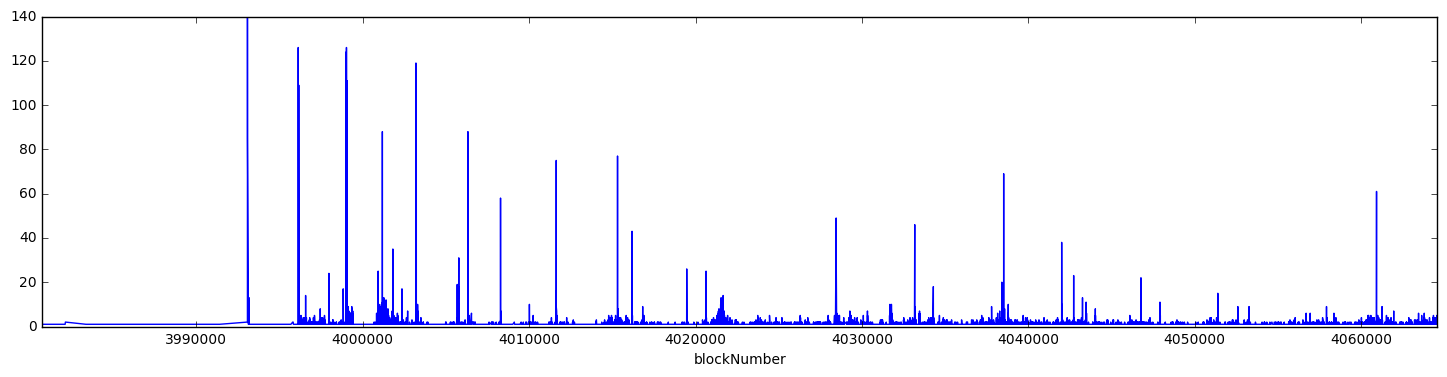

In [8]:
transfer.groupby('blockNumber').count()['blockHash'].plot(figsize=(18,4))

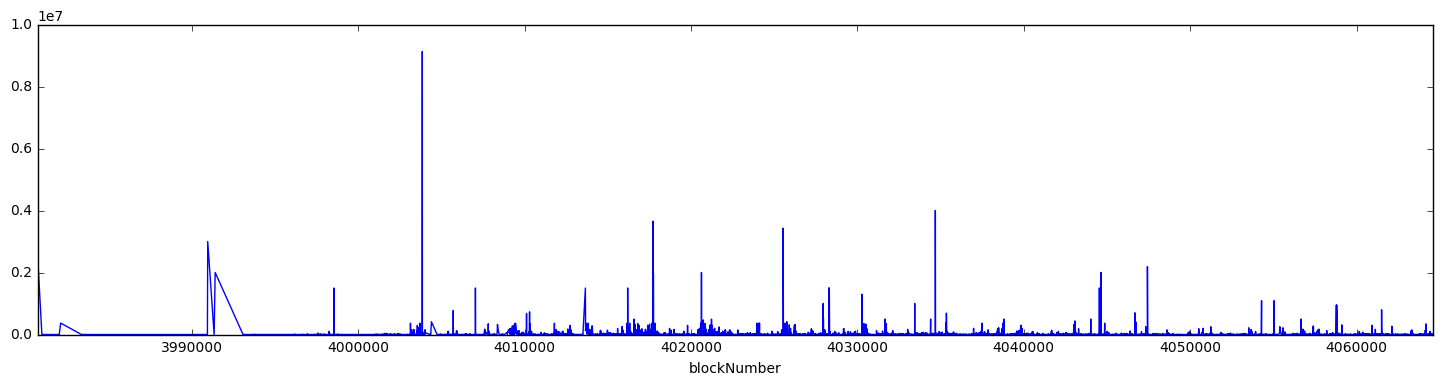

In [9]:
transfer.groupby('blockNumber').mean()['token_amount'].plot(figsize=(18,4))

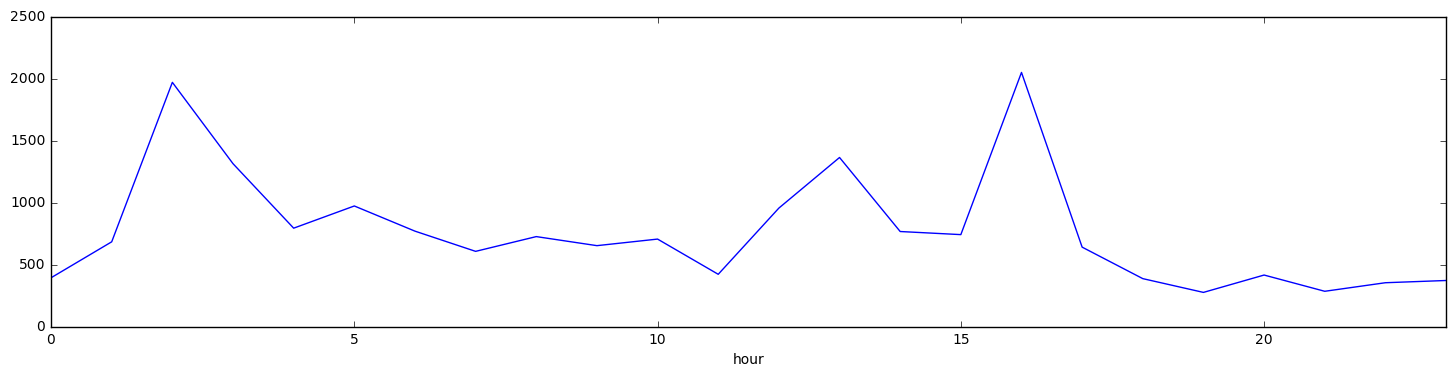

In [10]:
transfer.groupby('hour').count()['token_amount'].plot(figsize=(18,4))

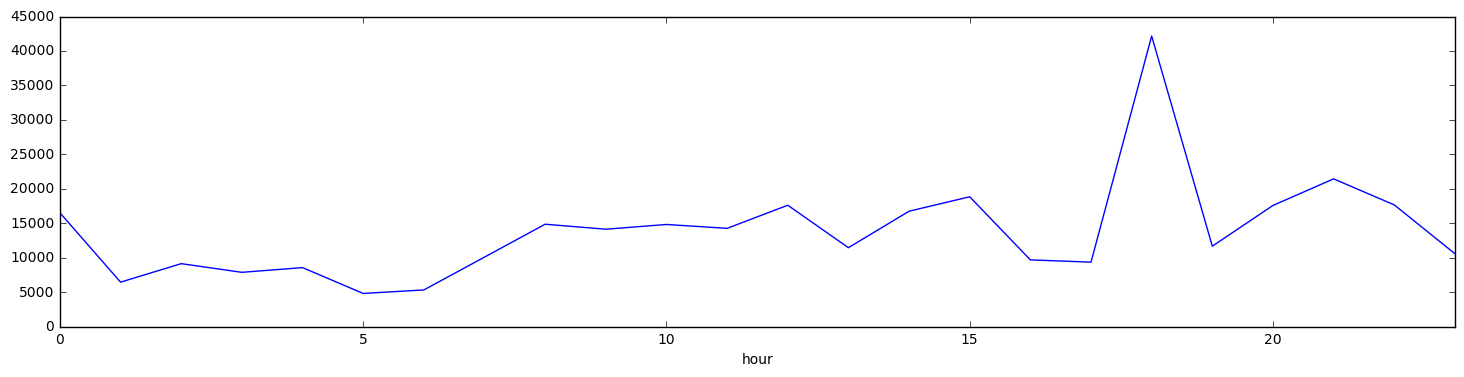

In [11]:
transfer.groupby('hour').mean()['token_amount'].plot(figsize=(18,4))

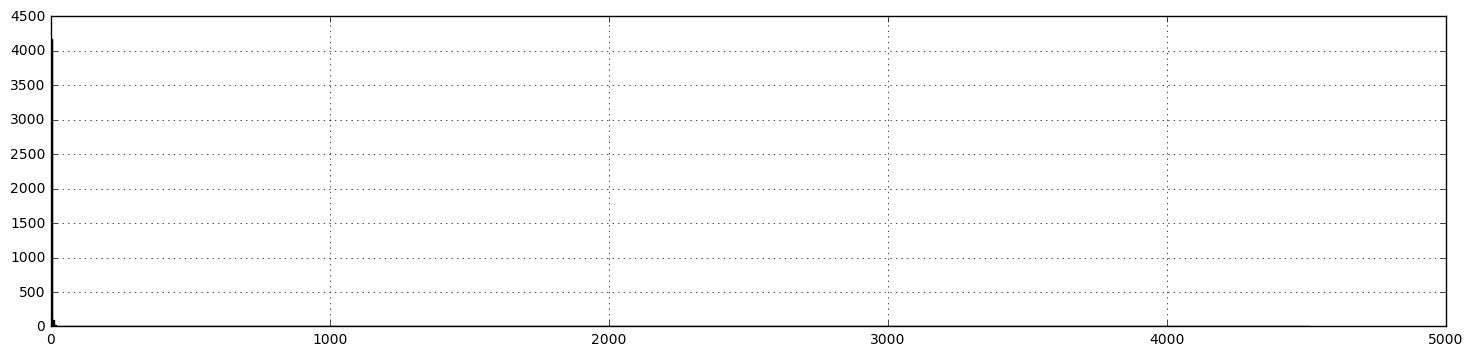

In [12]:
transfer.groupby('from').count()['blockHash'].hist(bins=1000,figsize=(18,4))

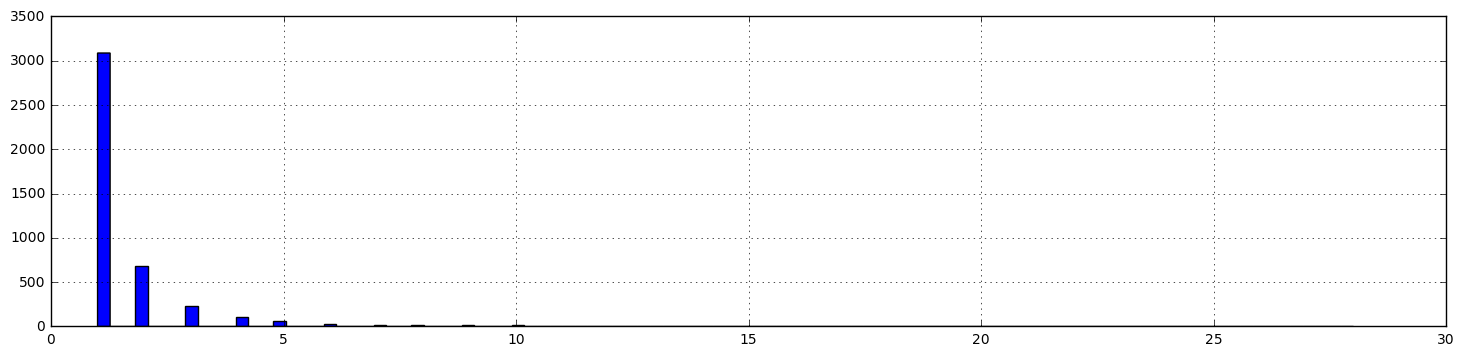

In [13]:
out_degree = transfer.groupby('from').count()['blockHash']
out_degree[out_degree<30].hist(bins=100,figsize=(18,4))

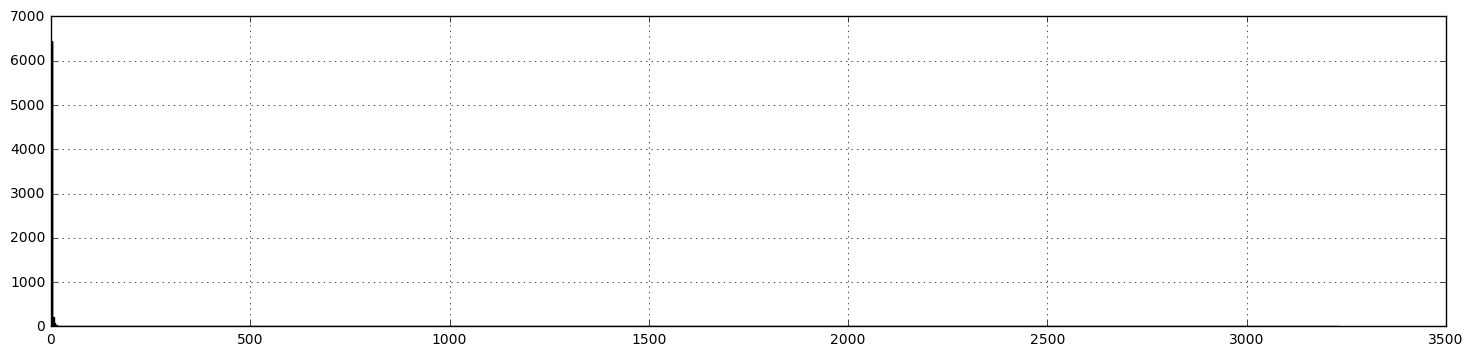

In [14]:
transfer.groupby('token_to').count()['blockHash'].hist(bins=1000,figsize=(18,4))

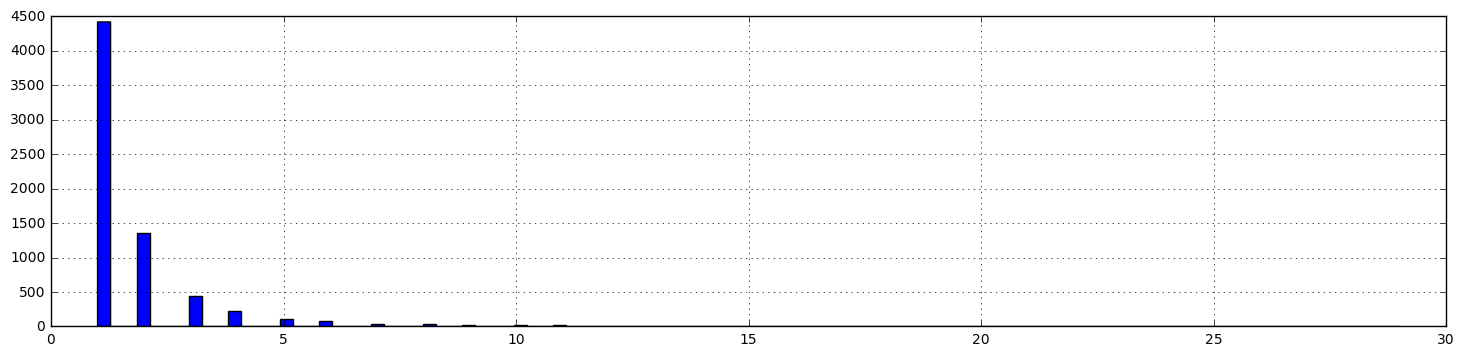

In [15]:
in_degree = transfer.groupby('token_to').count()['blockHash']
in_degree[in_degree<30].hist(bins=100,figsize=(18,4))

In [16]:
wanted = transfer[['hash','from','token_to','token_amount']]
froms = wanted['from'].tolist()
tos = wanted['token_to'].tolist()
amounts = wanted['token_amount'].tolist()
graph = nx.DiGraph()
for i in range(len(froms)):
    graph.add_edge(froms[i], tos[i], weight=amounts[i])

In [17]:
nodes = graph.nodes()
print(len(nodes))

6886


In [18]:
def print_attr(degree):
    dg = pd.Series(degree)
    print(dg.value_counts(), dg.sort_values())

In [19]:
print_attr(graph.degree())

2       3819
1       2336
3        448
4        122
5         55
6         30
8         15
7         12
9         10
11         9
10         6
13         5
18         3
15         2
17         2
21         1
500        1
2636       1
33         1
241        1
645        1
23         1
14         1
22         1
518        1
766        1
3226       1
dtype: int64 0x7f944988780f9ff30f88c766c2a67306b23f3104       1
0xbd6e51835624ada34384f33ed159fd9d5ede3480       1
0x73939830f157fbf61d295c59c77772c330a06cb7       1
0x73861ebe3daa584ee7cb94fd770525d6e91b7efb       1
0x9d137567c35d6704b9155a88c8480237c7b24705       1
0xee8a2ccfc498dc5d2e9eec49d9a9ca6bec229fed       1
0x9d1d3221c940f2a3d20a4c677b3d7d6bb8f85903       1
0x734008e1e8b7d6fb2908c0832bb997d12f1b18cc       1
0x40cde48bcc35c4c89b2a4055ba95287865313467       1
0x40e3c7075ba1f18246c591269acbaafa4f1dc85b       1
0xbd1f60b4273e83c69bc7fde6e46927575a66d16a       1
0xbd0b219a0e813bc35ea76ac8de42ca20f266ffe0       1
0x732a5dc023f63db972f061

In [20]:
top_addresses_by_degree = [
    '0x62eae029fe829fc66c953fa67e15761c941e23ce', # ~5 OMG
    '0x8737305011408648c0c2fc6ff831d566fbaac483', # ~94 OMG
    '0x1151314c646ce4e0efd76d1af4760ae66a9fe30f', # Bitfinex_Wallet1
    '0x5e575279bf9f4acf0a130c186861454247394c06', # liqui.io_Erc20
    '0x2ebb507b1da5b2619515d542a8af27b0747a6bc2', # ~16 OMG
    '0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98', # 2(Bittrex)
    '0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85', # 48
]

In [36]:
transfer[transfer['from']==top_addresses_by_degree[0]]['token_amount'].describe()

count      4514.000000
mean       1007.867765
std        2540.108045
min           2.000000
25%         999.500000
50%         999.500000
75%         999.500000
max      137437.100000
Name: token_amount, dtype: float64

In [21]:
reverse_graph = graph.reverse()
for address in top_addresses_by_degree:
    total_out_weight = 0
    for edge in graph[address]:
        total_out_weight += graph[address][edge]['weight']
    total_in_weight = 0
    for edge in reverse_graph[address]:
        total_in_weight += reverse_graph[address][edge]['weight']
    print(address, total_out_weight, total_in_weight, total_in_weight-total_out_weight)

0x62eae029fe829fc66c953fa67e15761c941e23ce 3232782.849 300002.0 -2932780.849
0x8737305011408648c0c2fc6ff831d566fbaac483 4331544.83501 6598864.0615 2267319.2265
0x1151314c646ce4e0efd76d1af4760ae66a9fe30f 2768153.38359 9059570.993 6291417.60941
0x5e575279bf9f4acf0a130c186861454247394c06 2151214.63232 2052291.93636 -98922.6959546
0x2ebb507b1da5b2619515d542a8af27b0747a6bc2 414926.5445 1013202.71588 598276.171376
0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98 1711858.04031 0 -1711858.04031
0xeb68aa2764b4a9a943658b2e61db4c902b2ebf85 76707274.9375 0 -76707274.9375


In [ ]:
# taken from https://github.com/mpld3/mpld3/blob/master/examples/networkxd3forcelayout.py

from networkx.readwrite import json_graph
import mpld3

graph_data = json_graph.node_link_data(graph)

class NetworkXD3ForceLayout(mpld3.plugins.PluginBase):
    """A NetworkX to D3 Force Layout Plugin"""

    JAVASCRIPT = """
    mpld3.register_plugin("networkxd3forcelayout", NetworkXD3ForceLayoutPlugin);
    NetworkXD3ForceLayoutPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    NetworkXD3ForceLayoutPlugin.prototype.constructor = NetworkXD3ForceLayoutPlugin;
    NetworkXD3ForceLayoutPlugin.prototype.requiredProps = ["graph",
                                                                "ax_id",];
    NetworkXD3ForceLayoutPlugin.prototype.defaultProps = { coordinates: "data",
                                                               gravity: 1,
                                                               charge: -30,
                                                               link_strength: 1,
                                                               friction: 0.9,
                                                               link_distance: 20,
                                                               maximum_stroke_width: 2,
                                                               minimum_stroke_width: 1,
                                                               nominal_stroke_width: 1,
                                                               maximum_radius: 10,
                                                               minimum_radius: 1,
                                                               nominal_radius: 5,
                                                            };
    function NetworkXD3ForceLayoutPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    var color = d3.scale.category20();
    NetworkXD3ForceLayoutPlugin.prototype.zoomScaleProp = function (nominal_prop, minimum_prop, maximum_prop) {
        var zoom = this.ax.zoom;
        scalerFunction = function() {
            var prop = nominal_prop;
            if (nominal_prop*zoom.scale()>maximum_prop) prop = maximum_prop/zoom.scale();
            if (nominal_prop*zoom.scale()<minimum_prop) prop = minimum_prop/zoom.scale();
            return prop
        }
        return scalerFunction;
    }
    NetworkXD3ForceLayoutPlugin.prototype.setupDefaults = function () {
        this.zoomScaleStroke = this.zoomScaleProp(this.props.nominal_stroke_width,
                                                  this.props.minimum_stroke_width,
                                                  this.props.maximum_stroke_width)
        this.zoomScaleRadius = this.zoomScaleProp(this.props.nominal_radius,
                                                  this.props.minimum_radius,
                                                  this.props.maximum_radius)
    }
    NetworkXD3ForceLayoutPlugin.prototype.zoomed = function() {
            this.tick()
        }
    NetworkXD3ForceLayoutPlugin.prototype.draw = function(){
        plugin = this
        brush = this.fig.getBrush();
        DEFAULT_NODE_SIZE = this.props.nominal_radius;
        var height = this.fig.height
        var width = this.fig.width
        var graph = this.props.graph
        var gravity = this.props.gravity.toFixed()
        var charge = this.props.charge.toFixed()
        var link_distance = this.props.link_distance.toFixed()
        var link_strength = this.props.link_strength.toFixed()
        var friction = this.props.friction.toFixed()
        this.ax = mpld3.get_element(this.props.ax_id, this.fig)
        var ax = this.ax;
        this.ax.elements.push(this)
        ax_obj = this.ax;
        var width = d3.max(ax.x.range()) - d3.min(ax.x.range()),
            height = d3.max(ax.y.range()) - d3.min(ax.y.range());
        var color = d3.scale.category20();
        this.xScale = d3.scale.linear().domain([0, 1]).range([0, width]) // ax.x;
        this.yScale = d3.scale.linear().domain([0, 1]).range([height, 0]) // ax.y;
        this.force = d3.layout.force()
                            .size([width, height]);
        this.svg = this.ax.axes.append("g");
        for(var i = 0; i < graph.nodes.length; i++){
            var node = graph.nodes[i];
            if (node.hasOwnProperty('x')) {
                node.x = this.ax.x(node.x);
            }
            if (node.hasOwnProperty('y')) {
                node.y = this.ax.y(node.y);
            }
        }
        this.force
            .nodes(graph.nodes)
            .links(graph.links)
            .linkStrength(link_strength)
            .friction(friction)
            .linkDistance(link_distance)
            .charge(charge)
            .gravity(gravity)
            .start();
        this.link = this.svg.selectAll(".link")
            .data(graph.links)
          .enter().append("line")
            .attr("class", "link")
            .attr("stroke", "black")
            .style("stroke-width", function (d) { return Math.sqrt(d.value); });
        this.node = this.svg.selectAll(".node")
            .data(graph.nodes)
          .enter().append("circle")
            .attr("class", "node")
            .attr("r", function(d) {return d.size === undefined ? DEFAULT_NODE_SIZE : d.size ;})
            .style("fill", function (d) { return d.color; });
        this.node.append("title")
            .text(function (d) { return d.name; });
        this.force.on("tick", this.tick.bind(this));
        this.setupDefaults()
    };
    NetworkXD3ForceLayoutPlugin.prototype.tick = function() {
        this.link.attr("x1", function (d) { return this.ax.x(this.xScale.invert(d.source.x)); }.bind(this))
                 .attr("y1", function (d) { return this.ax.y(this.yScale.invert(d.source.y)); }.bind(this))
                 .attr("x2", function (d) { return this.ax.x(this.xScale.invert(d.target.x)); }.bind(this))
                 .attr("y2", function (d) { return this.ax.y(this.yScale.invert(d.target.y)); }.bind(this));
        this.node.attr("transform", function (d) {
            return "translate(" + this.ax.x(this.xScale.invert(d.x)) + "," + this.ax.y(this.yScale.invert(d.y)) + ")";
            }.bind(this)
        );
    }
    """

    def __init__(self, graph, ax,
                 gravity=1,
                 link_distance=20,
                 charge=-30,
                 node_size=5,
                 link_strength=1,
                 friction=0.9):

        self.dict_ = {"type": "networkxd3forcelayout",
                      "graph": graph,
                      "ax_id": mpld3.utils.get_id(ax),
                      "gravity": gravity,
                      "charge": charge,
                      "friction": friction,
                      "link_distance": link_distance,
                      "link_strength": link_strength,
                      "nominal_radius": node_size}

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(22, 14))
ax = axs

mpld3.plugins.connect(fig, NetworkXD3ForceLayout(graph_data,
                                                 ax,
                                                 gravity=.5,
                                                 link_distance=5,
#                                                  charge=-600,
                                                 node_size=1,
                                                 friction=1
                                                )
                     )

mpld3.show()


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [16/May/2018 20:49:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2018 20:49:19] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2018 20:49:19] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2018 20:49:21] code 404, message Not Found
127.0.0.1 - - [16/May/2018 20:49:21] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...
